In [73]:
from preprocessing_py_files.feature_engineering import *
from preprocessing_py_files.feature_selection import *
from preprocessing_py_files.modeling import *
from preprocessing_py_files.ploting import *
from preprocessing_py_files.apriori_clusters import *
from preprocessing_py_files.preprocessing import *
from preprocessing_py_files.initial_visualizations import *
from preprocessing_py_files.helping_functions import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
cust_info = pd.read_csv('data/customer_info.csv')
cust_info, fishermen=find_fishermen(cust_info)
#cust_info, elec=find_outliers(cust_info, "lifetime_spend_electronics",3)
cust_info, pets=find_outliers(cust_info, "lifetime_spend_petfood",3)
cust_info_pp = cust_info.drop(columns=['Unnamed: 0', 'customer_id', 'customer_name', 'customer_gender',
                                       'customer_birthdate', 'loyalty_card_number', 'latitude', 'longitude'])
imputation(cust_info_pp, cust_info_pp.select_dtypes(include=[np.number]).columns)
scaling(cust_info_pp, cust_info_pp.select_dtypes(include=[np.number]).columns)


c:\Users\loure\Documents\GitHub\ML2_Project\py_files\helping_functions.py:66: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = datacopy[(data[column] > mean + threshold*std)]


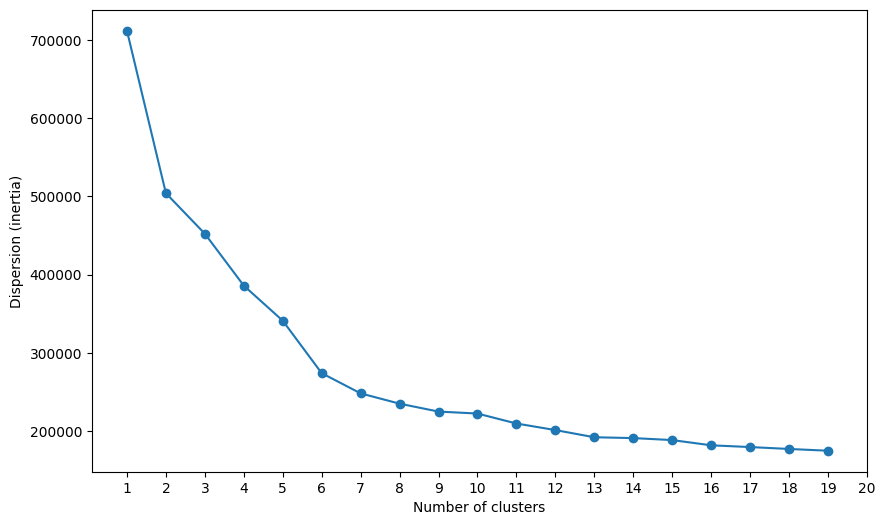

In [85]:
dispersion = create_dispersion_list(cust_info_pp)
plot_elbow_graph(dispersion)

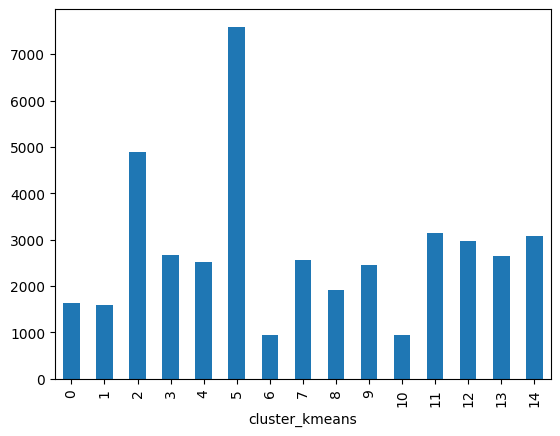

In [86]:
allocate_clusters_kmeans(cust_info, cust_info_pp, n_clusters=15)
cust_info.groupby(['cluster_kmeans']).size().plot(kind='bar')
plt.show()

In [87]:
show_clusters(cust_info, 'cluster_kmeans', cluster_numbers=[6,10])

Cluster 6 size: 946
Cluster 10 size: 948
Overall dataset size: 41565


,Overall Mean,Cluster 6 Mean,Cluster 10 Mean
Unnamed: 0,21801.734224,22038.226216,21136.666667
customer_id,25022.457332,25143.774841,24788.590717
kids_home,1.134645,4.732694,0.315565
teens_home,0.889395,0.729032,0.021575
number_complaints,0.715549,1.004274,0.026795
distinct_stores_visited,1.703259,1.121012,1.365801
lifetime_spend_groceries,5343.420041,5096.709302,909.094937
lifetime_spend_electronics,2091.162517,2037.876321,505.187764
typical_hour,13.620949,17.650055,18.846323
lifetime_spend_vegetables,467.834070,501.641469,96.482353


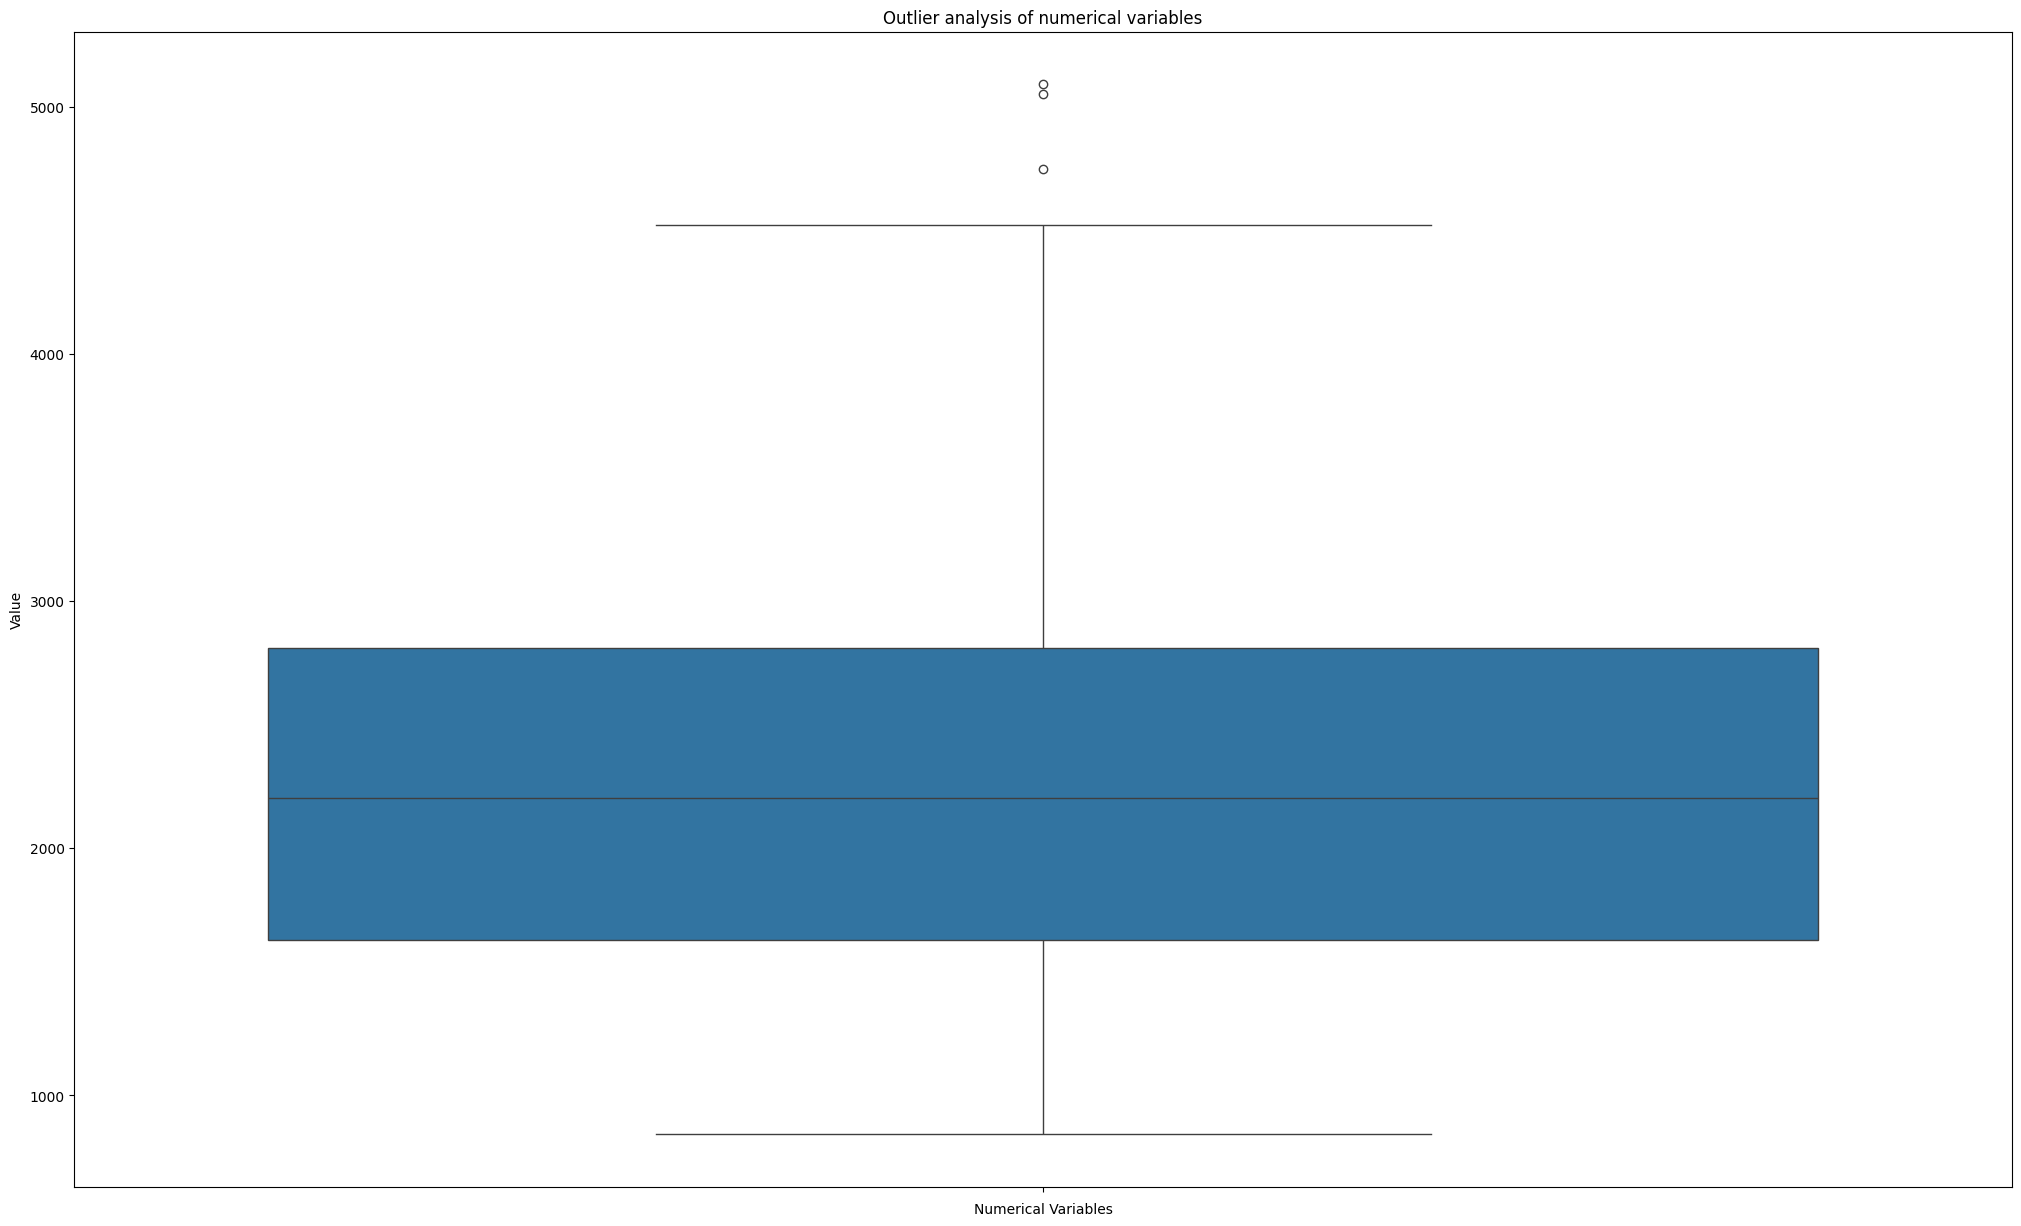

In [88]:
plt.figure(figsize=(25,15))
sns.boxplot(data=cust_info[cust_info['cluster_kmeans'] == 10]["lifetime_spend_alcohol_drinks"])
plt.xlabel('Numerical Variables')
plt.ylabel('Value')
plt.title('Outlier analysis of numerical variables')
#plt.xticks(rotation=90)
plt.show()

In [89]:
good_fellas = cust_info[cust_info['cluster_kmeans'] == 10]
cust_info_pp = cust_info_pp[cust_info['cluster_kmeans'] != 10]
cust_info = cust_info[cust_info['cluster_kmeans'] != 10]

In [90]:
#dispersion = create_dispersion_list(cust_info_pp)
#plot_elbow_graph(dispersion)

In [91]:
#(cust_info, cust_info_pp, n_clusters=13)
#cust_info.groupby(['cluster_kmeans']).size().plot(kind='bar')
#plt.show()

In [71]:
#show_clusters(cust_info, 'cluster_kmeans', cluster_numbers=[0,12])

Cluster 0 size: 1184
Cluster 12 size: 1324
Overall dataset size: 39426


,Overall Mean,Cluster 0 Mean,Cluster 12 Mean
Unnamed: 0,21823.403794,21894.522804,21762.092145
customer_id,25034.999188,26027.246622,24626.136707
kids_home,1.156145,0.852389,1.000762
teens_home,0.904549,0.626184,0.999224
number_complaints,0.737133,0.448276,0.503828
distinct_stores_visited,1.719544,1.986099,1.391745
lifetime_spend_groceries,5166.673490,1836.614865,11341.131420
lifetime_spend_electronics,1756.997159,444.770270,7936.417674
typical_hour,13.500092,14.246046,13.533858
lifetime_spend_vegetables,474.905705,461.607639,499.125385


In [92]:
#cust_info, pets=find_outliers(cust_info, "lifetime_spend_petfood",3)
#plt.figure(figsize=(25,15))
#sns.boxplot(data=cust_info[cust_info['cluster_kmeans'] == 8][""])
#plt.xlabel('Numerical Variables')
#plt.ylabel('Value')
#plt.title('Outlier analysis of numerical variables')
#plt.xticks(rotation=90)
#plt.show()

In [93]:
#karens = cust_info[cust_info['cluster_kmeans'] == 8]
#cust_info_pp=cust_info_pp[cust_info['cluster_kmeans'] != 8]
#cust_info=cust_info[cust_info['cluster_kmeans'] != 8]

In [94]:
#dispersion = create_dispersion_list(cust_info_pp)
#plot_elbow_graph(dispersion)

In [95]:
#allocate_clusters_kmeans(cust_info, cust_info_pp, n_clusters=14)
#cust_info.groupby(['cluster_kmeans']).size().plot(kind='bar')
#plt.show()

In [96]:
#show_clusters(cust_info, 'cluster_kmeans', cluster_numbers=[11])

In [28]:
#furadurex = cust_info[cust_info['cluster_kmeans'] == 11]
#cust_info_pp=cust_info_pp[cust_info['cluster_kmeans'] != 11]
#cust_info=cust_info[cust_info['cluster_kmeans'] != 11]

In [97]:
#dispersion = create_dispersion_list(cust_info_pp)
#plot_elbow_graph(dispersion)

In [98]:
#allocate_clusters_kmeans(cust_info, cust_info_pp, n_clusters=14)
#cust_info.groupby(['cluster_kmeans']).size().plot(kind='bar')
#plt.show()

In [99]:
#show_clusters(cust_info, 'cluster_kmeans', cluster_numbers=[2])